In [ ]:
from sltns.experiment._exp import ExperimentRunner
from sltns.plots._plots import TimeSeriesPlotter

In [2]:
param_grid = {
    "prior_len": [250, 200, 120, 80, 60, 50, 40, 35, 25, 15],  # last k source points
    "lambda_1": [10, 1, 1e-1, 1e-3, 1e-4],
    "lambda_2": [1, 5, 10, 30, 50, 100, 500, 1000, 5000],
    "lambda_3": [0.1, 1, 10, 20, 30, 50, 100, 200, 500, 1000],
    "eta": [1e-3, 5e-3, 1e-2, 1e-4],
    "pq_norm": ["l1", "l2"],
}
fixed_kwargs = {
    "delta": 1e-3,
    "max_outer": 500,
    "max_inner": 50,
    "verbose": False,
    "patience": 3,
    "tol_inner": 1e-3,
}

{'MDRIFT': 4.609952482504297, 'OLS': 2.467832084650279, 'Mean': 25.49385857498133, 'ARIMA(0, 2, 0)': 4.019800025258563}
{'MDRIFT': 1.8791460235860633, 'OLS': 2.467832084650279, 'Mean': 25.49385857498133, 'ARIMA(0, 2, 0)': 4.019800025258563}


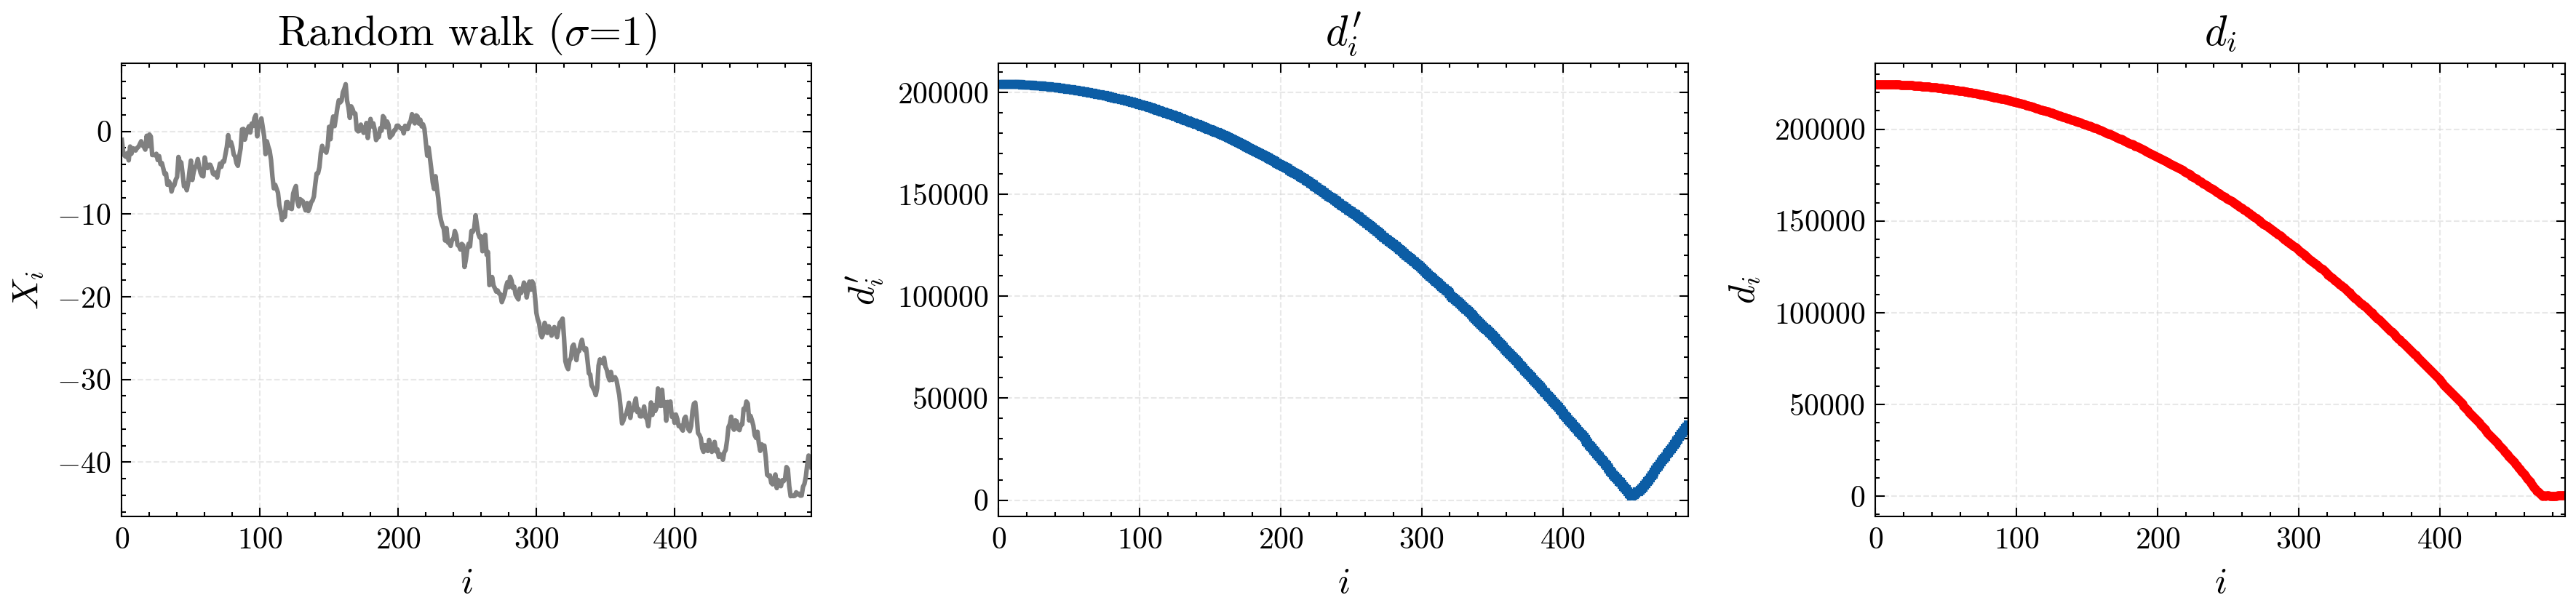

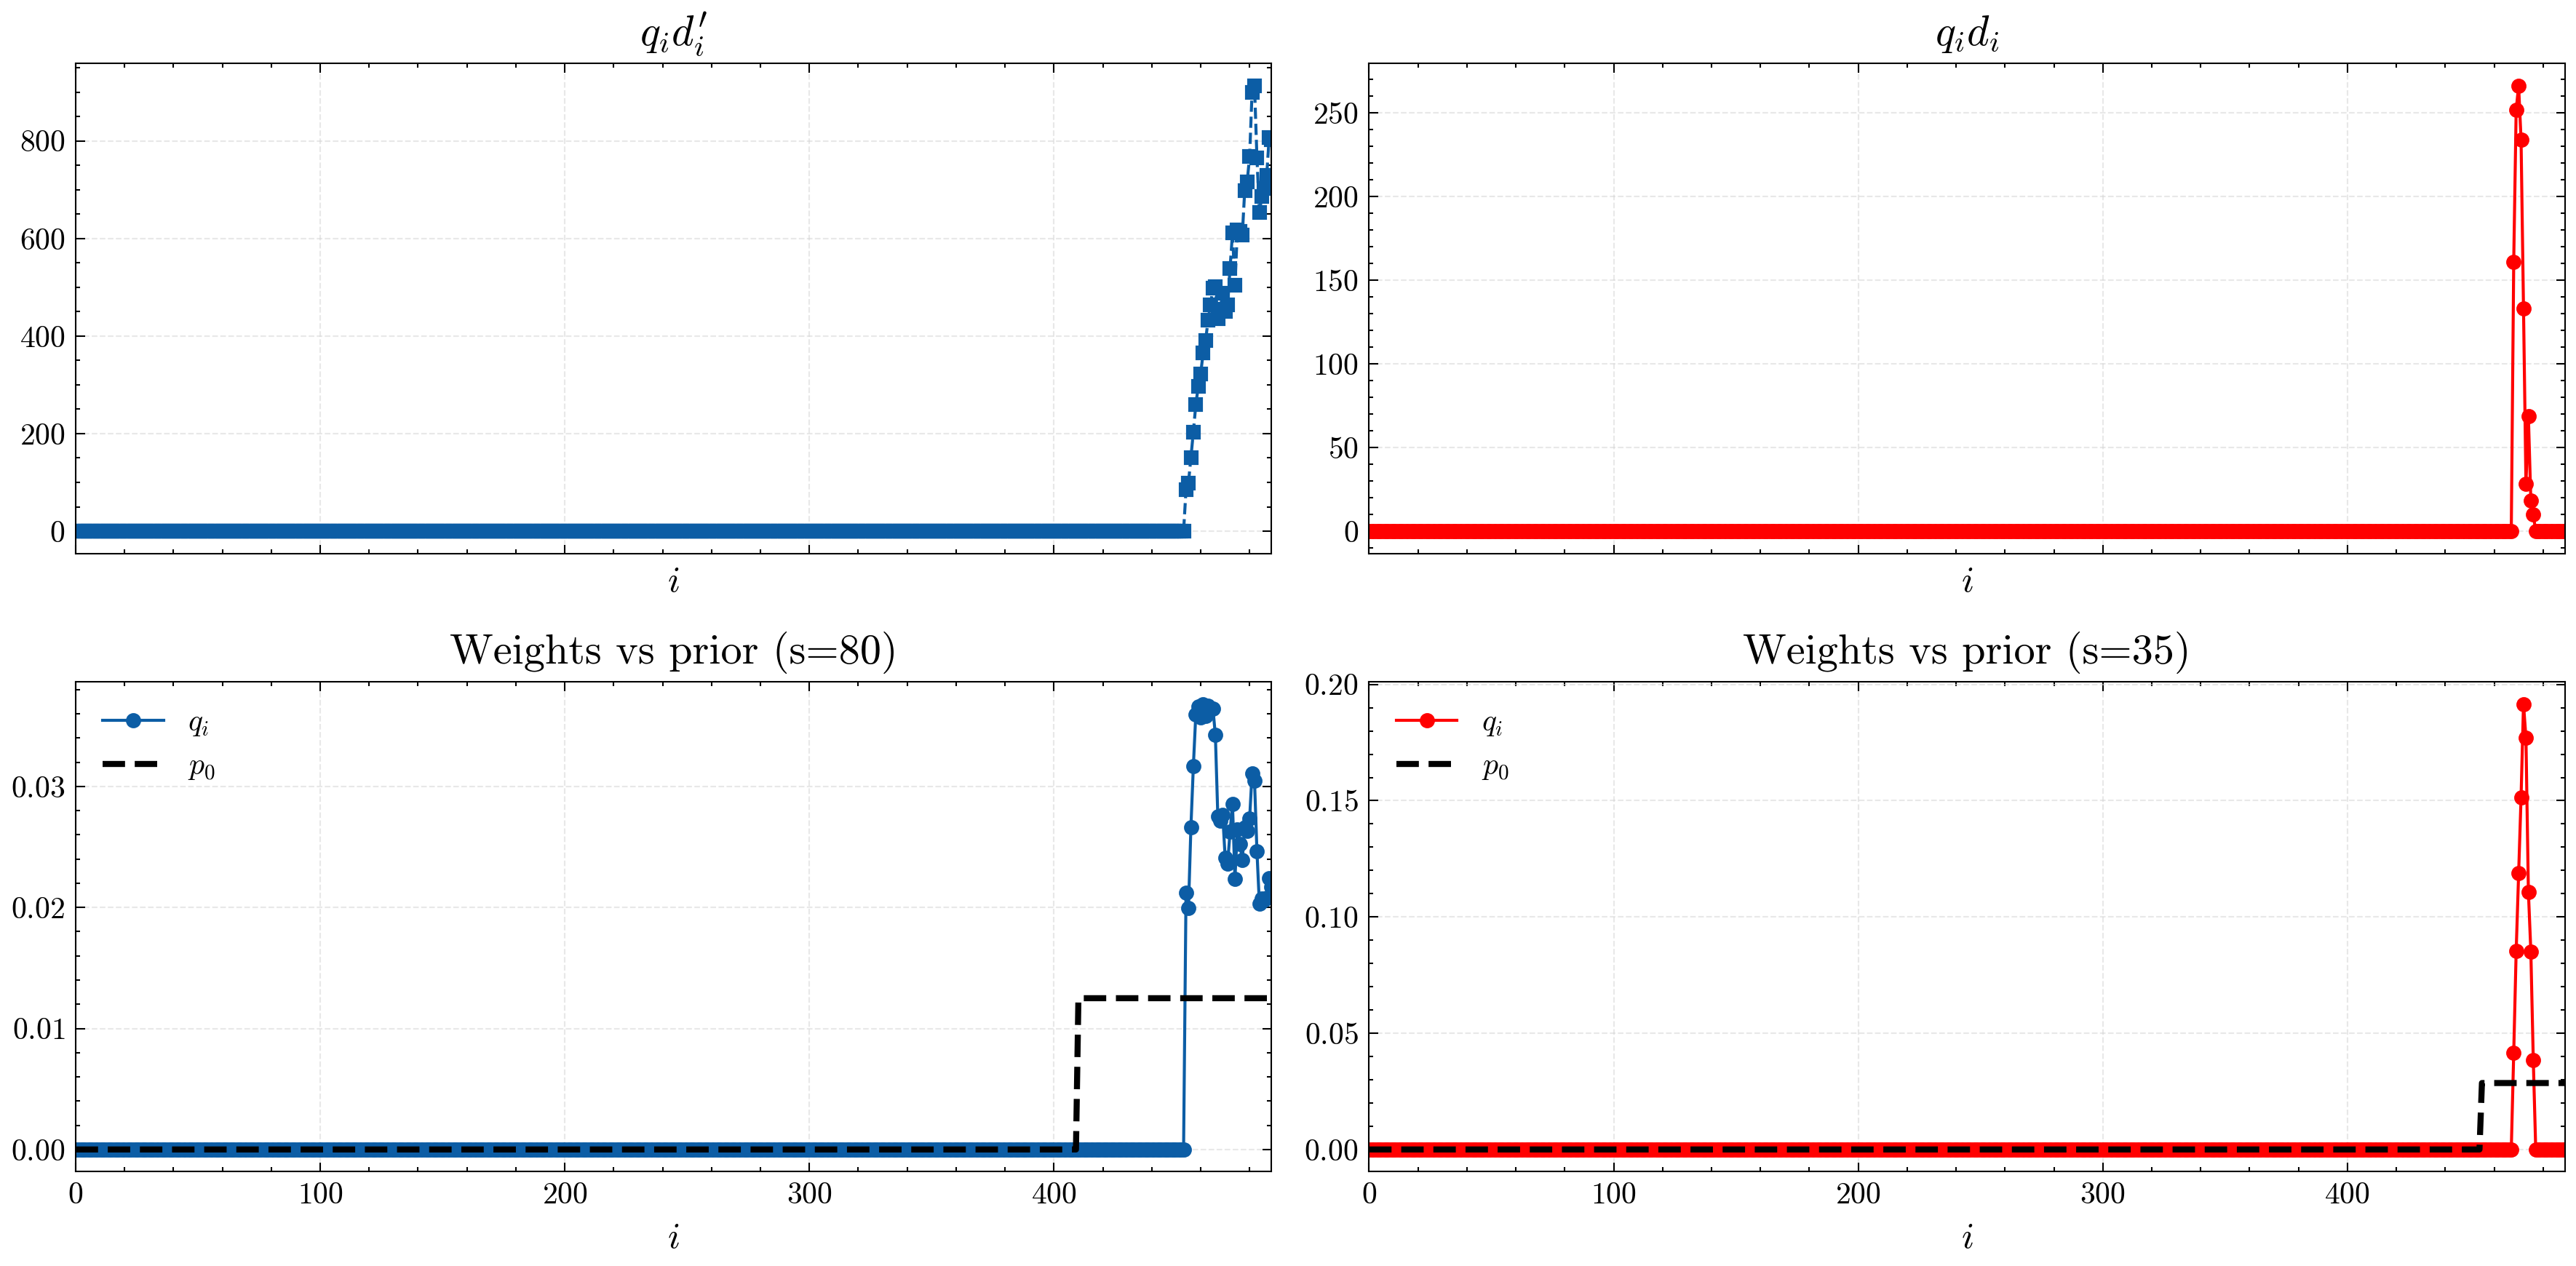

In [3]:
runner = ExperimentRunner(param_grid, fixed_kwargs)
process_cfg = {"kind": "random_walk", "sigma": 1}

series, d_abs, d, q_abs, q, p0_abs, p0, abs_metrics, metrics = (
    runner.compare_abs_vs_regular(
        process_cfg=process_cfg,
        seed=321,
        w_val=10,
        w_test=10,
        n_iter=100,
        series_length=500,
        full_refit=True,
        slice_prior=False,
    )
)
print(metrics)
print(abs_metrics)

plotter = TimeSeriesPlotter(series_list=[series], configs=[process_cfg], grid=True)
fig1, fig2 = plotter.plot_compare_abs_vs_regular(
    d_abs=d_abs,
    d=d,
    q_abs=q_abs,
    q=q,
    p0_abs=p0_abs,
    p0=p0,
    return_figs=True,
)
plotter.save("displots.png", dpi=600, figsize=(10, 10), format="png", fig=fig1)
plotter.save("weightplots.png", dpi=600, figsize=(10, 10), format="png", fig=fig2)

{'MDRIFT': 1.9210487937091698, 'OLS': 1.84713585339625, 'Mean': 1.6640440714772466, 'ARIMA(2, 2, 2)': 1.802944183690465}
{'MDRIFT': 3.309908583928768, 'OLS': 1.84713585339625, 'Mean': 1.6640440714772466, 'ARIMA(2, 2, 2)': 1.802944183690465}


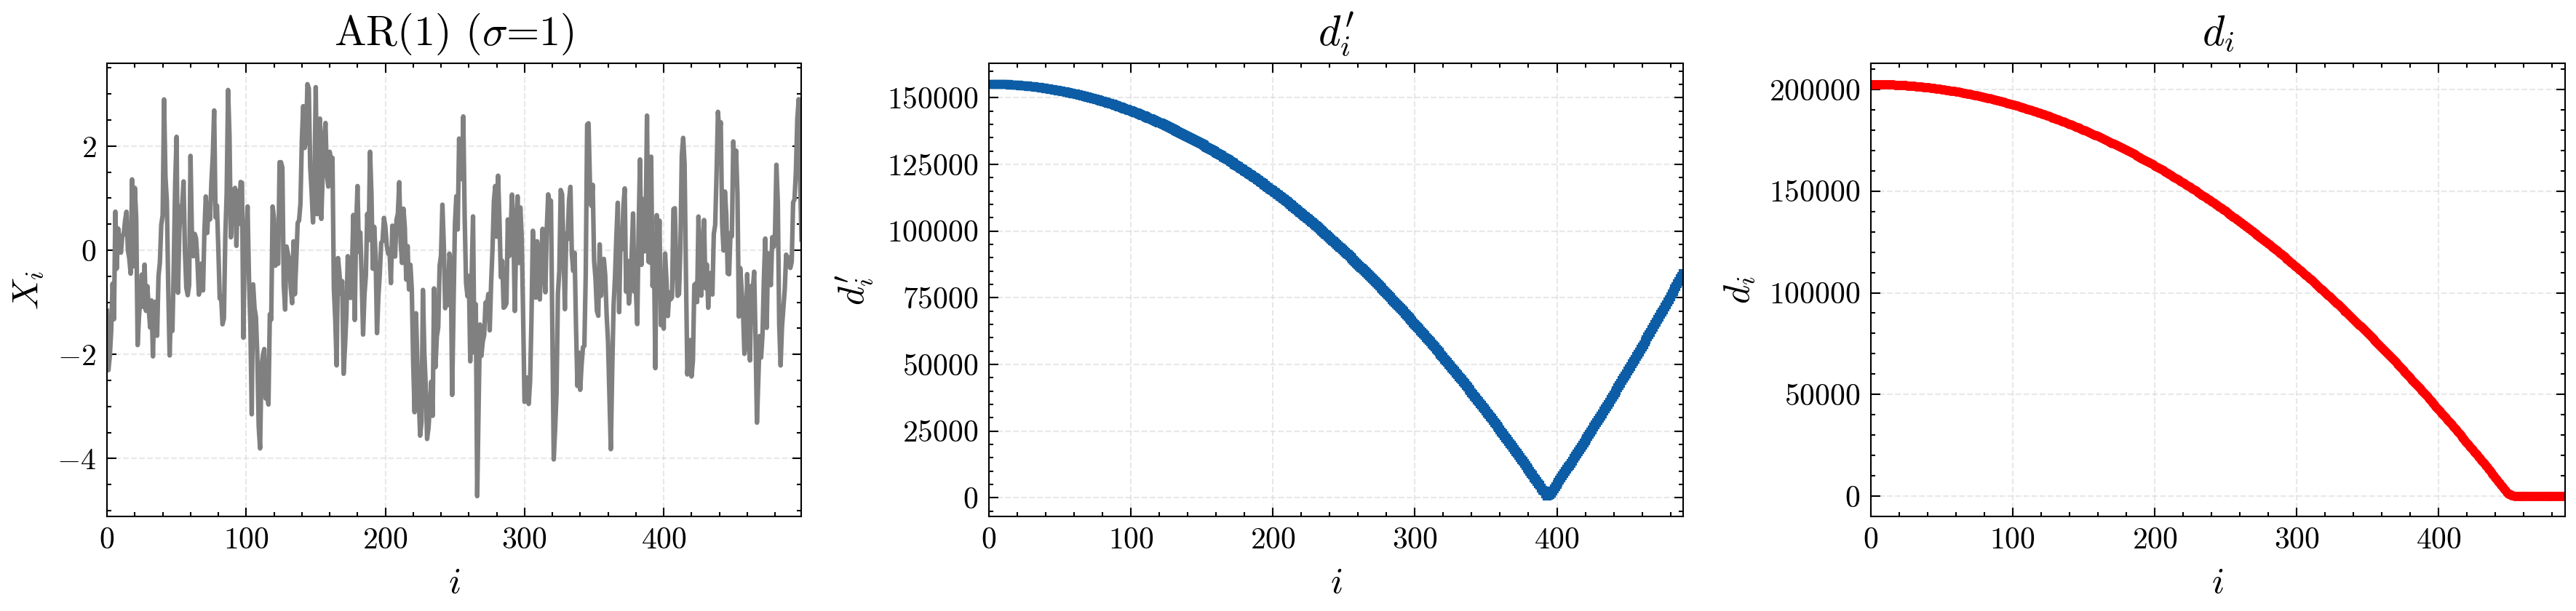

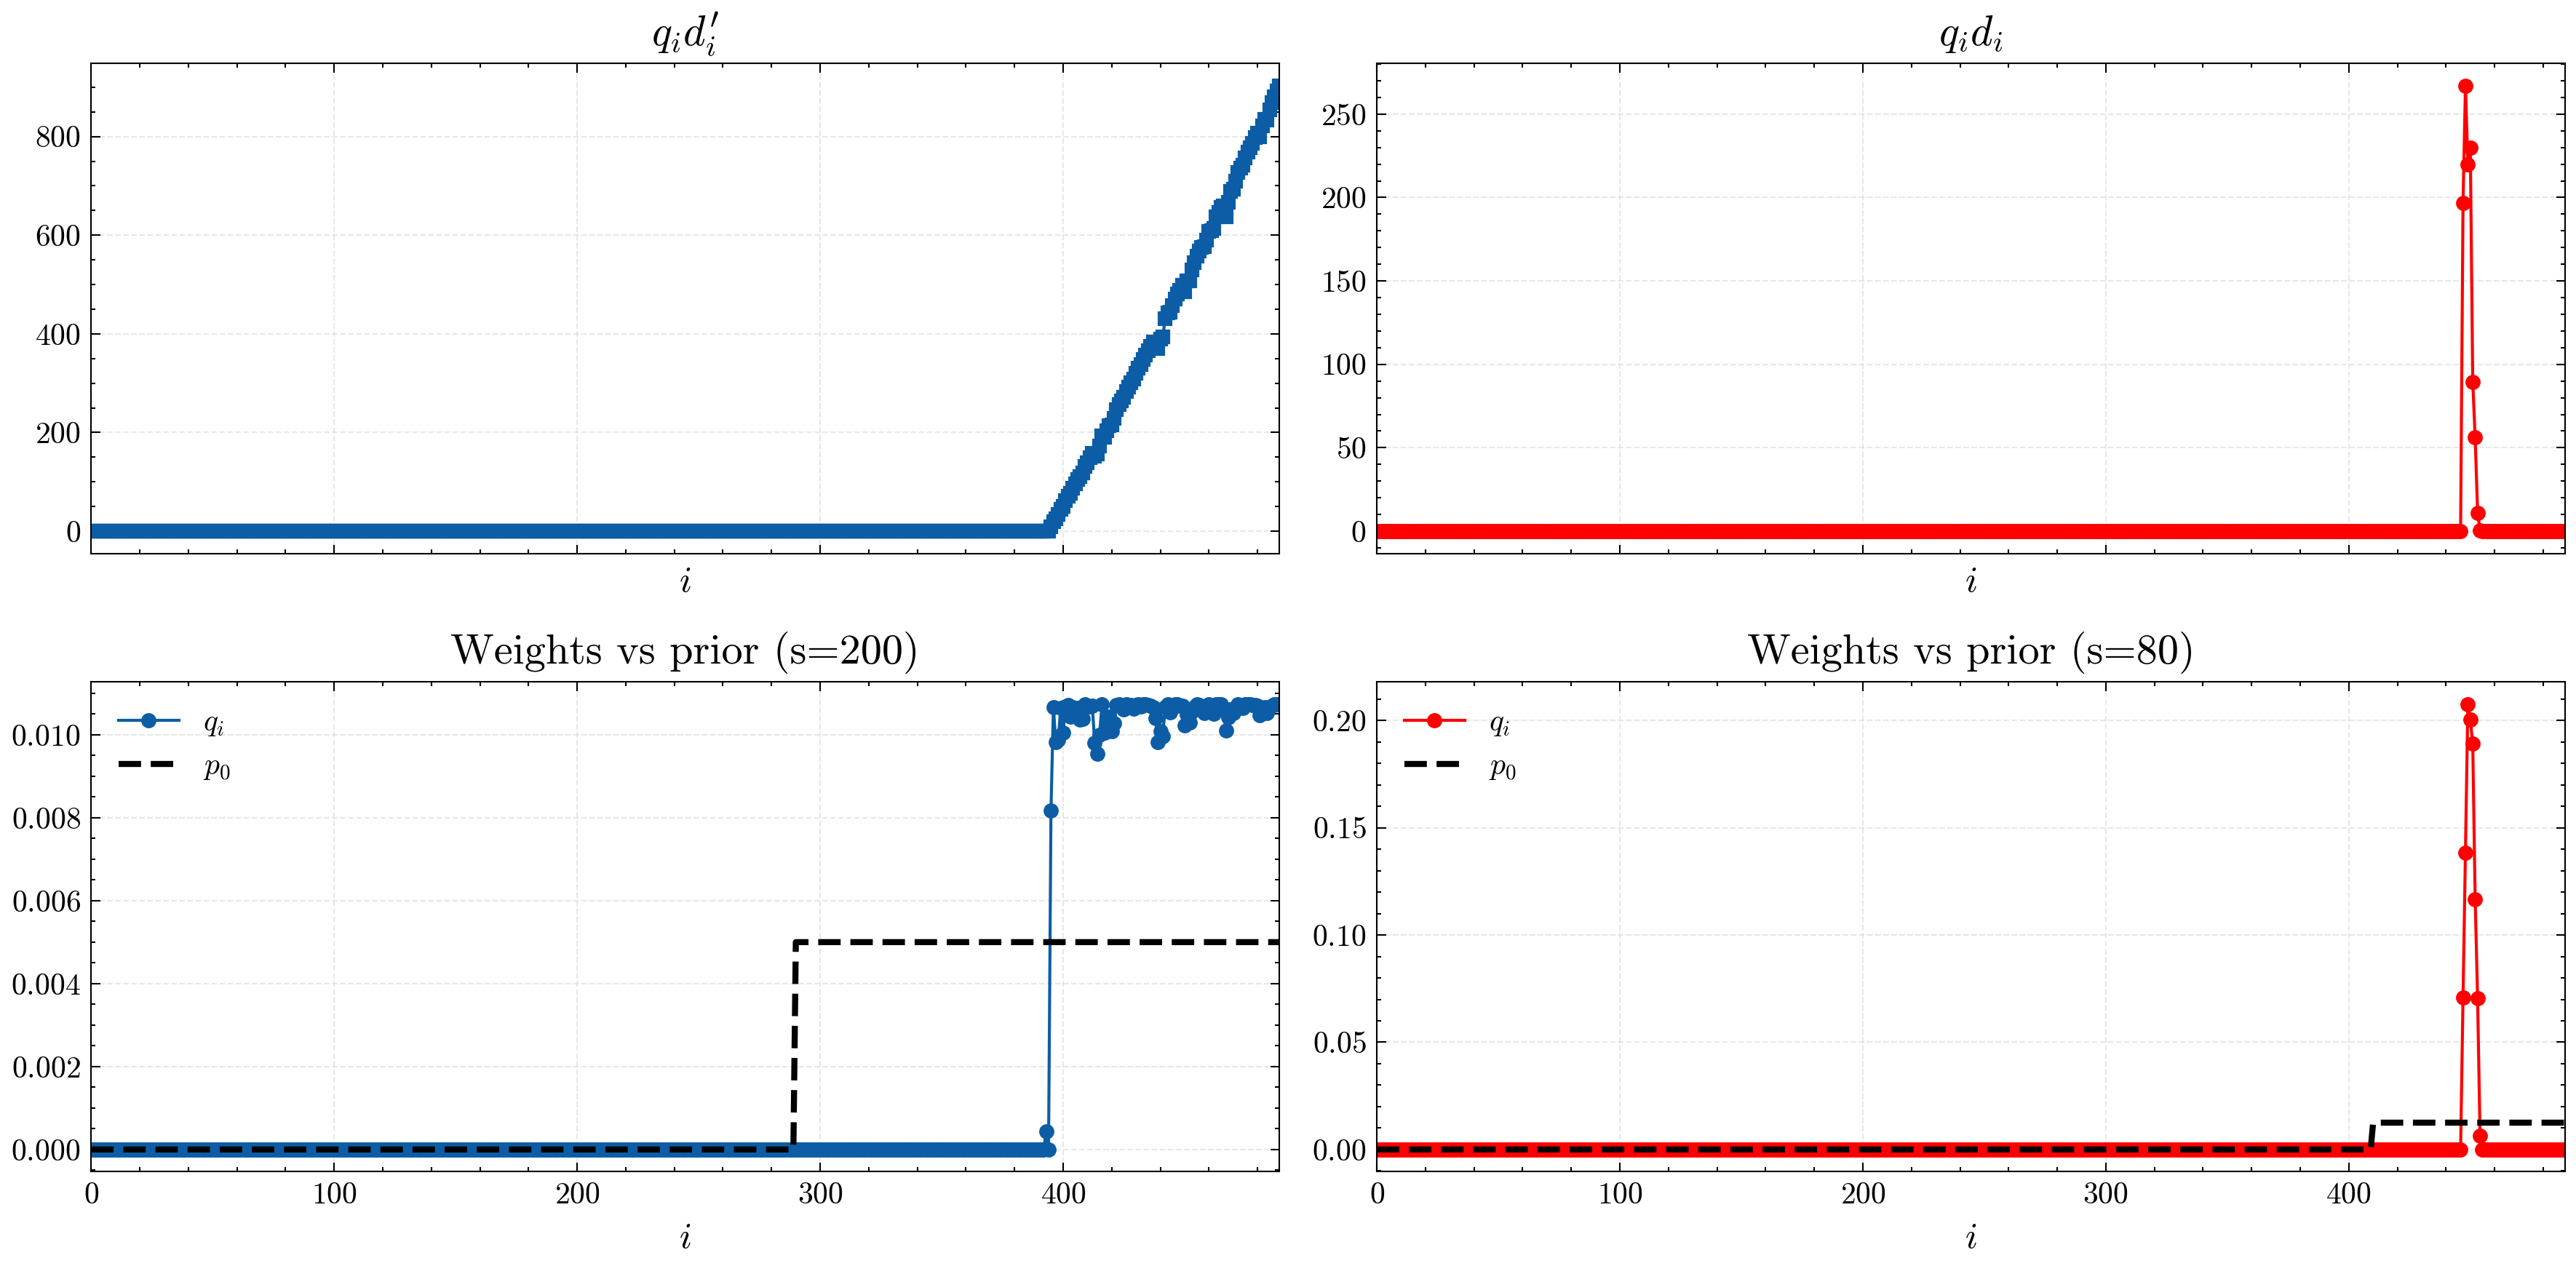

In [4]:
runner = ExperimentRunner(param_grid, fixed_kwargs)
process_cfg = {"kind": "ar1", "sigma": 1}

series, d_abs, d, q_abs, q, p0_abs, p0, abs_metrics, metrics = (
    runner.compare_abs_vs_regular(
        process_cfg=process_cfg,
        seed=321,
        w_val=10,
        w_test=10,
        n_iter=100,
        series_length=500,
        full_refit=True,
        slice_prior=False,
    )
)
print(metrics)
print(abs_metrics)

plotter = TimeSeriesPlotter(series_list=[series], configs=[process_cfg], grid=True)
fig1, fig2 = plotter.plot_compare_abs_vs_regular(
    d_abs=d_abs,
    d=d,
    q_abs=q_abs,
    q=q,
    p0_abs=p0_abs,
    p0=p0,
    return_figs=True,
)
plotter.save("displotsar1.png", dpi=600, figsize=(10, 10), format="png", fig=fig1)
plotter.save("weightplotsar1.png", dpi=600, figsize=(10, 10), format="png", fig=fig2)